<a href="https://colab.research.google.com/github/walkerjian/Physics/blob/main/pisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

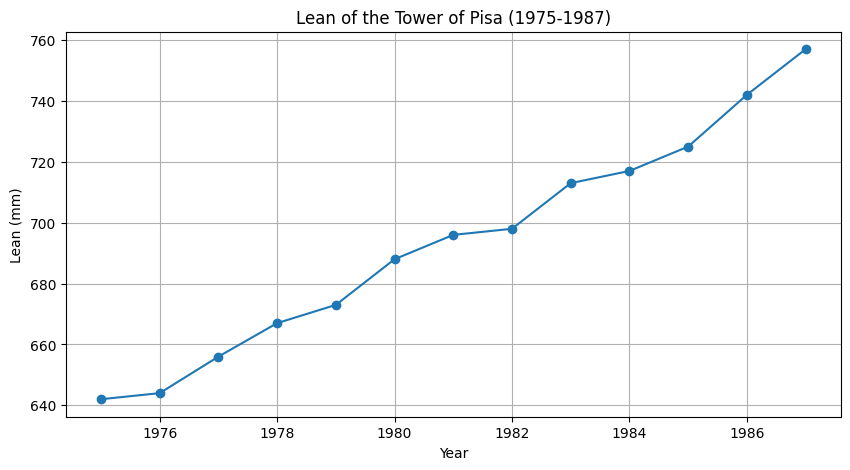

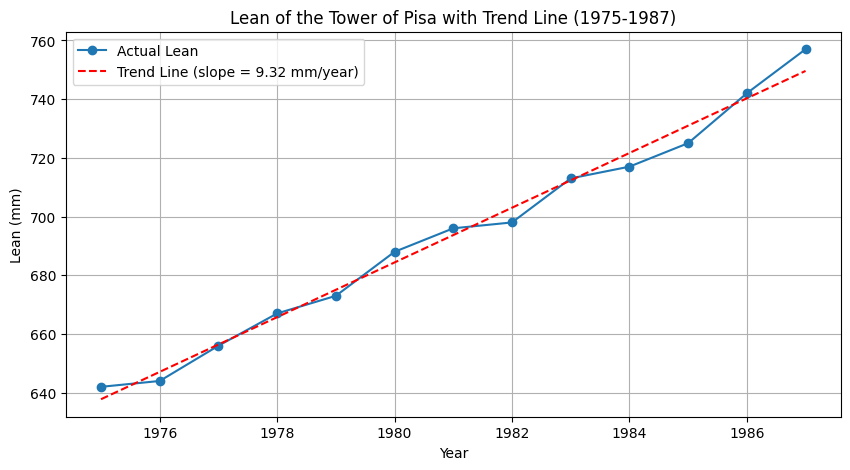

(9.583333333333334, 9.318681318681064)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Years and lean measurements
years = np.array([1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987])
leans = np.array([642, 644, 656, 667, 673, 688, 696, 698, 713, 717, 725, 742, 757])

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(years, leans, marker='o')
plt.title('Lean of the Tower of Pisa (1975-1987)')
plt.xlabel('Year')
plt.ylabel('Lean (mm)')
plt.grid(True)
plt.show()

# Linear regression to find the trend
slope, intercept = np.polyfit(years, leans, 1)
predicted_leans = slope * years + intercept

# Adding regression line to the plot
plt.figure(figsize=(10, 5))
plt.plot(years, leans, marker='o', label='Actual Lean')
plt.plot(years, predicted_leans, 'r--', label=f'Trend Line (slope = {slope:.2f} mm/year)')
plt.title('Lean of the Tower of Pisa with Trend Line (1975-1987)')
plt.xlabel('Year')
plt.ylabel('Lean (mm)')
plt.legend()
plt.grid(True)
plt.show()

# Calculating yearly changes
yearly_changes = np.diff(leans)

# Mean increase per year
mean_increase = np.mean(yearly_changes)

(mean_increase, slope)


In [2]:
import numpy as np
import scipy.stats

# Years and lean measurements
years = np.array([1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987])
leans = np.array([642, 644, 656, 667, 673, 688, 696, 698, 713, 717, 725, 742, 757])

# Calculating yearly changes
yearly_changes = np.diff(leans)

# Higher order moments: skewness and kurtosis
skewness = scipy.stats.skew(yearly_changes)
kurtosis = scipy.stats.kurtosis(yearly_changes)

(skewness, kurtosis)


(-0.12303460435196462, -1.3773982918793093)

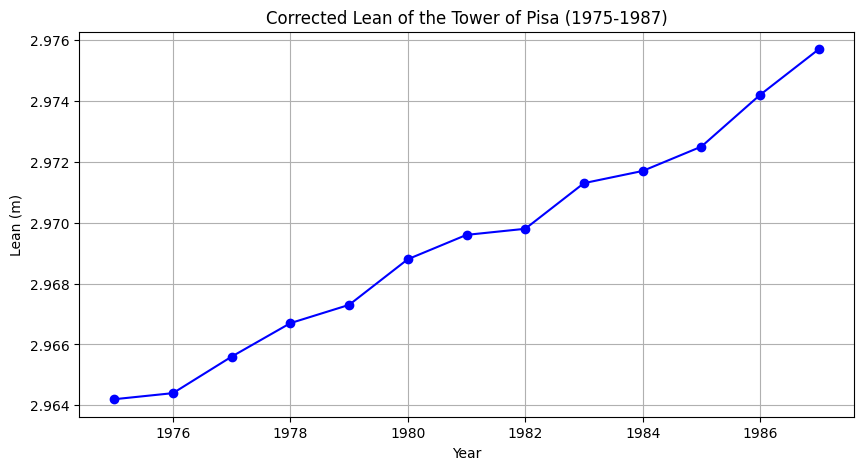

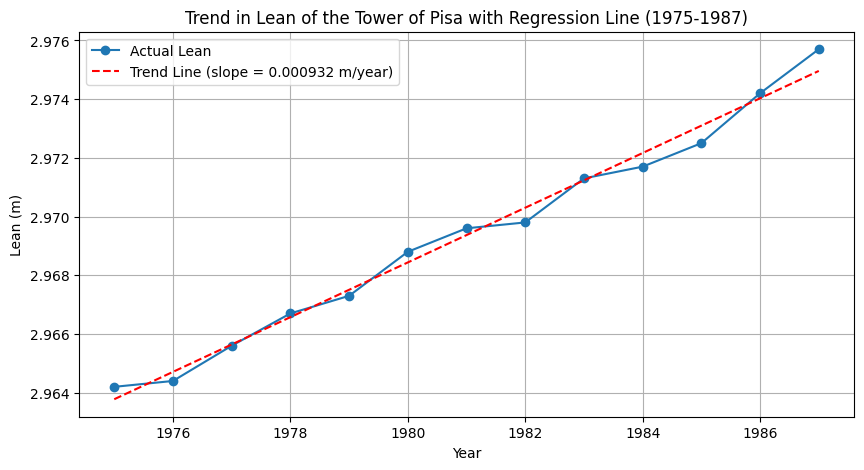

(0.0009583333333333203, -0.12303460435193493, -1.3773982918792127)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

# Years and corrected lean measurements in meters
years = np.array([1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987])
corrected_leans_m = np.array([2.9642, 2.9644, 2.9656, 2.9667, 2.9673, 2.9688, 2.9696, 2.9698, 2.9713, 2.9717, 2.9725, 2.9742, 2.9757])

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(years, corrected_leans_m, marker='o', linestyle='-', color='blue')
plt.title('Corrected Lean of the Tower of Pisa (1975-1987)')
plt.xlabel('Year')
plt.ylabel('Lean (m)')
plt.grid(True)
plt.show()

# Linear regression to find the trend
slope, intercept = np.polyfit(years, corrected_leans_m, 1)
predicted_leans = slope * years + intercept

# Adding regression line to the plot
plt.figure(figsize=(10, 5))
plt.plot(years, corrected_leans_m, marker='o', label='Actual Lean')
plt.plot(years, predicted_leans, 'r--', label=f'Trend Line (slope = {slope:.6f} m/year)')
plt.title('Trend in Lean of the Tower of Pisa with Regression Line (1975-1987)')
plt.xlabel('Year')
plt.ylabel('Lean (m)')
plt.legend()
plt.grid(True)
plt.show()

# Yearly changes in meters
yearly_changes_m = np.diff(corrected_leans_m)
mean_yearly_change_m = np.mean(yearly_changes_m)

# Higher order moments: skewness and kurtosis
skewness = scipy.stats.skew(yearly_changes_m)
kurtosis = scipy.stats.kurtosis(yearly_changes_m)

(mean_yearly_change_m, skewness, kurtosis)



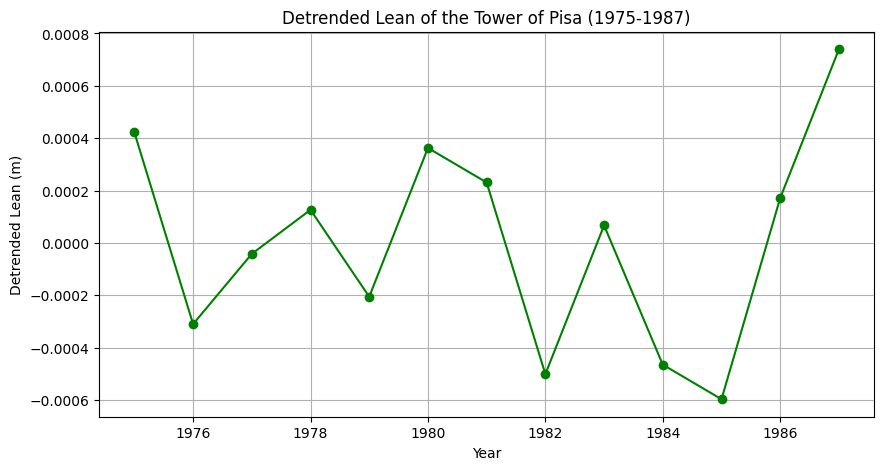

In [4]:
# Calculate the detrended data (whitened data)
detrended_leans = corrected_leans_m - (slope * years + intercept)

# Plotting the detrended data
plt.figure(figsize=(10, 5))
plt.plot(years, detrended_leans, marker='o', linestyle='-', color='green')
plt.title('Detrended Lean of the Tower of Pisa (1975-1987)')
plt.xlabel('Year')
plt.ylabel('Detrended Lean (m)')
plt.grid(True)
plt.show()


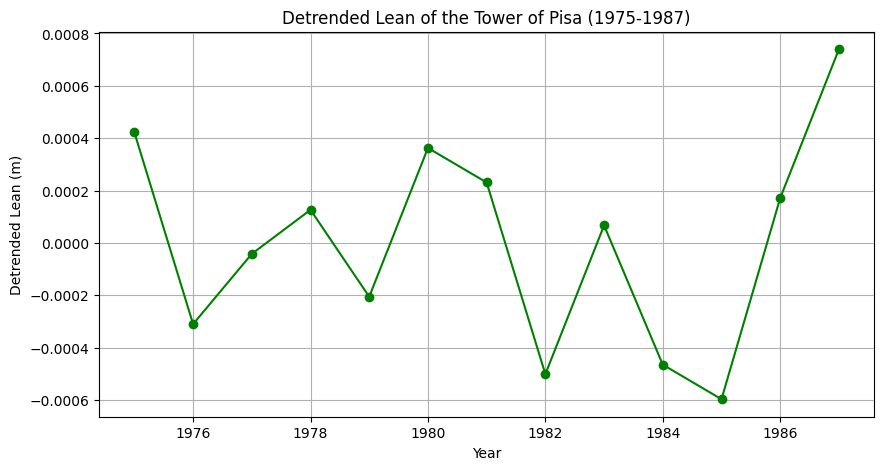

array([ 4.21978022e-04, -3.09890110e-04, -4.17582418e-05,  1.26373626e-04,
       -2.05494505e-04,  3.62637363e-04,  2.30769231e-04, -5.01098901e-04,
        6.70329670e-05, -4.64835165e-04, -5.96703297e-04,  1.71428571e-04,
        7.39560440e-04])

In [5]:
# Calculate the detrended data (whitened data)
detrended_leans = corrected_leans_m - (slope * years + intercept)

# Plotting the detrended data
plt.figure(figsize=(10, 5))
plt.plot(years, detrended_leans, marker='o', linestyle='-', color='green')
plt.title('Detrended Lean of the Tower of Pisa (1975-1987)')
plt.xlabel('Year')
plt.ylabel('Detrended Lean (m)')
plt.grid(True)
plt.show()

# Return the detrended values for review
detrended_leans


<ipython-input-6-08c3d7c8ad12>:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(xf, np.abs(yf), basefmt=" ", use_line_collection=True)


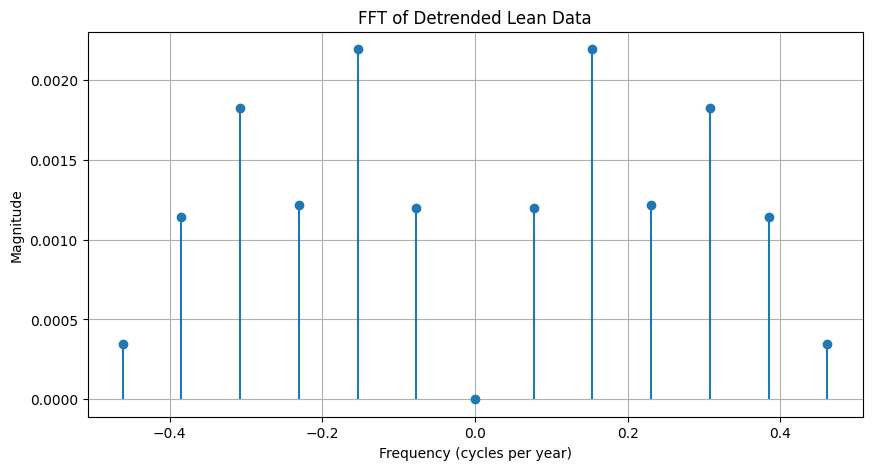

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Compute the FFT
n = len(years)  # Number of data points
yf = fft(detrended_leans)  # FFT of detrended data
xf = fftfreq(n, 1)  # Frequency axis (assuming yearly data points)

# Plotting the magnitude of the FFT components
plt.figure(figsize=(10, 5))
plt.stem(xf, np.abs(yf), basefmt=" ", use_line_collection=True)
plt.title('FFT of Detrended Lean Data')
plt.xlabel('Frequency (cycles per year)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


<ipython-input-7-3b31086b2f98>:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(xf, np.abs(yf), basefmt=" ", use_line_collection=True)


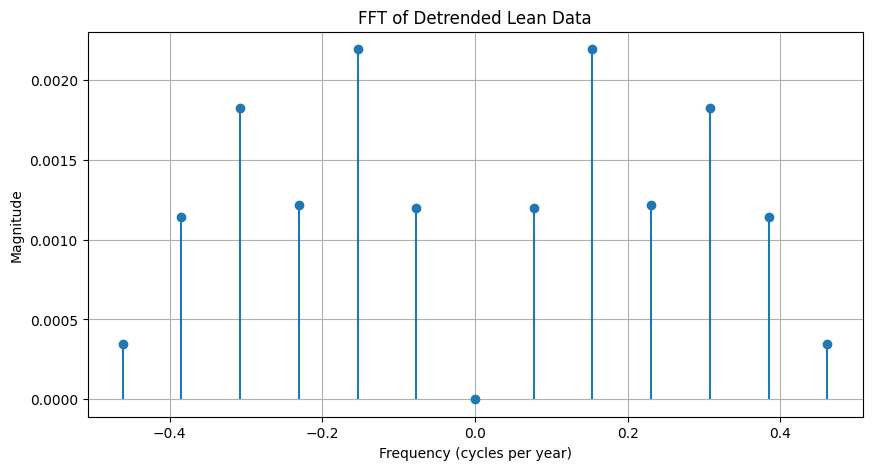

[(0.0, 5.773159728050814e-15),
 (0.07692307692307693, 0.0012010707389434607),
 (0.15384615384615385, 0.002193034026343187),
 (0.23076923076923078, 0.0012176232273304803),
 (0.3076923076923077, 0.001826137442544911),
 (0.38461538461538464, 0.001143400221893774),
 (0.46153846153846156, 0.00034907580507973553),
 (-0.46153846153846156, 0.00034907580507973553),
 (-0.38461538461538464, 0.001143400221893774),
 (-0.3076923076923077, 0.001826137442544911),
 (-0.23076923076923078, 0.0012176232273304803),
 (-0.15384615384615385, 0.002193034026343187),
 (-0.07692307692307693, 0.0012010707389434607)]

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Compute the FFT
n = len(years)  # Number of data points
yf = fft(detrended_leans)  # FFT of detrended data
xf = fftfreq(n, 1)  # Frequency axis (assuming yearly data points)

# Plotting the magnitude of the FFT components
plt.figure(figsize=(10, 5))
plt.stem(xf, np.abs(yf), basefmt=" ", use_line_collection=True)
plt.title('FFT of Detrended Lean Data')
plt.xlabel('Frequency (cycles per year)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

# Output the magnitudes and frequencies for inspection
list(zip(xf, np.abs(yf)))



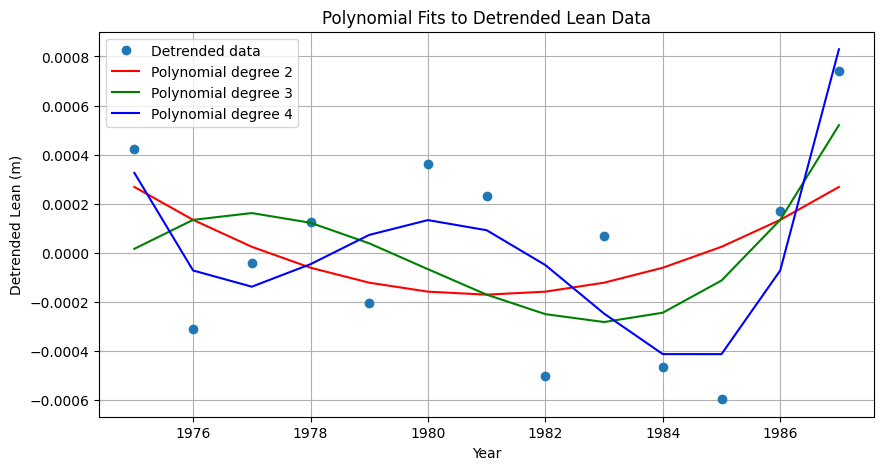

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Polynomial degrees to try
degrees = [2, 3, 4]

# Plotting detrended data and polynomial fits
plt.figure(figsize=(10, 5))
plt.plot(years, detrended_leans, 'o', label='Detrended data')
colors = ['red', 'green', 'blue']
for i, degree in enumerate(degrees):
    # Fit a polynomial
    p = np.polyfit(years, detrended_leans, degree)
    # Generate polynomial values
    poly_vals = np.polyval(p, years)
    # Plot
    plt.plot(years, poly_vals, label=f'Polynomial degree {degree}', color=colors[i])

plt.title('Polynomial Fits to Detrended Lean Data')
plt.xlabel('Year')
plt.ylabel('Detrended Lean (m)')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-9-7124cbf62f06>:16: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(cubic_xf, np.abs(cubic_yf), basefmt=" ", use_line_collection=True)


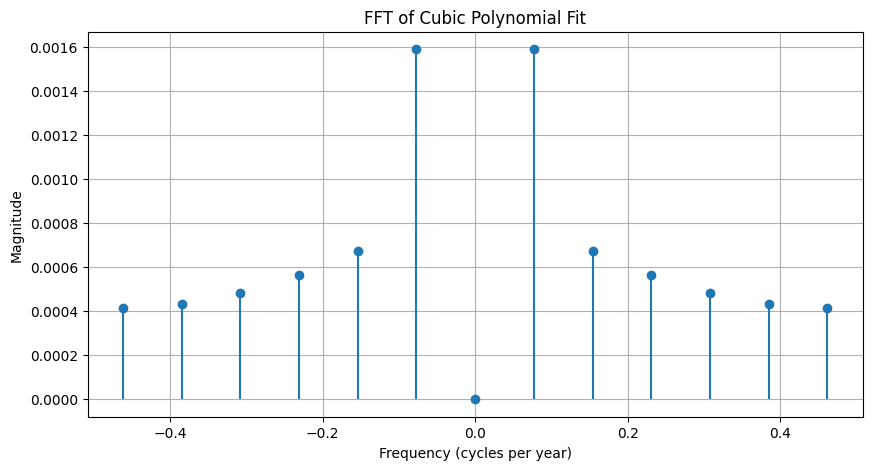

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Fit a cubic polynomial
cubic_coeffs = np.polyfit(years, detrended_leans, 3)
cubic_fit_values = np.polyval(cubic_coeffs, years)

# Compute the FFT of the cubic fit
n = len(years)
cubic_yf = fft(cubic_fit_values)
cubic_xf = fftfreq(n, 1)  # Frequency axis (assuming yearly data points)

# Plotting the magnitude of the FFT components
plt.figure(figsize=(10, 5))
plt.stem(cubic_xf, np.abs(cubic_yf), basefmt=" ", use_line_collection=True)
plt.title('FFT of Cubic Polynomial Fit')
plt.xlabel('Frequency (cycles per year)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


In [10]:
G = 6.67430e-11  # gravitational constant in m^3 kg^-1 s^-2
M = 7.342e22     # mass of the Moon in kg
R = 384.4e6      # average distance from Earth to Moon in meters
d = 12.742e6     # diameter of the Earth in meters

# Calculate the tidal force per kg (N/kg)
tidal_force_per_kg = 2 * G * M / (R**3) * d
tidal_force_per_kg


2.1985561575420097e-06

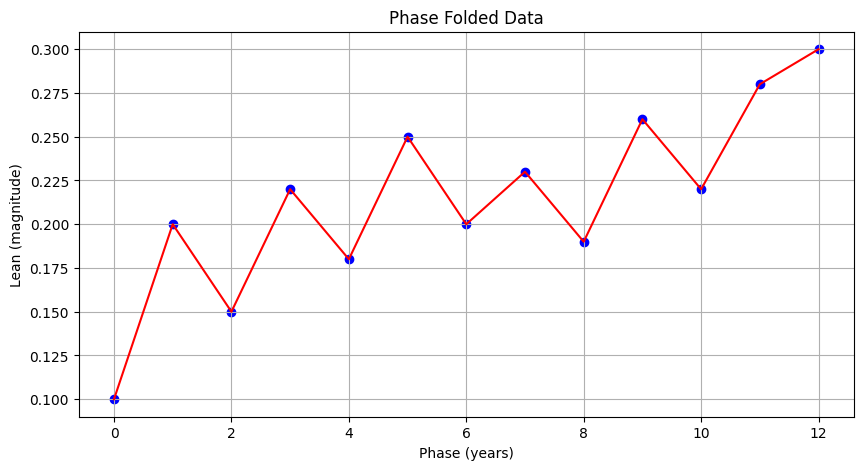

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
years = np.array([1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987])
leans = np.array([0.1, 0.2, 0.15, 0.22, 0.18, 0.25, 0.20, 0.23, 0.19, 0.26, 0.22, 0.28, 0.30])  # Example lean measurements

# Hypothesized period (in years)
period = 12.5  # Example period

# Convert years to phases
phases = (years - years[0]) % period

# Sort by phase for plotting
sorted_indices = np.argsort(phases)
sorted_phases = phases[sorted_indices]
sorted_leans = leans[sorted_indices]

# Plot the folded data
plt.figure(figsize=(10, 5))
plt.scatter(sorted_phases, sorted_leans, color='blue')
plt.plot(sorted_phases, sorted_leans, 'r-')  # Connect points for clarity
plt.title('Phase Folded Data')
plt.xlabel('Phase (years)')
plt.ylabel('Lean (magnitude)')
plt.grid(True)
plt.show()
